Install Library

In [68]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 708.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 110.1 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 124.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 124.3 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 99.8 kB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 137.0 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 943.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Import

In [69]:
import pandas as pd
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

Read file

In [122]:
with open('/home/drasogun/DraSoGun/Work/CANSAT_UDUCK/Hardware/logtest.txt', 'r', encoding='utf-8', errors='replace') as f:
    text = f.read()

Clean Data

In [126]:
blocks = text.split('-------------')
sec = 0
data = []
for block in blocks:
    lines = [l.strip() for l in block.splitlines() if l.strip()]
    if len(lines) < 16:
        continue
    # receive data
    latlon = lines[0]
    raw_time = lines[1]
    sp     = lines[2]
    cu     = lines[3]
    altg   = lines[4]
    hdop   = lines[5]
    sat    = lines[6]
    tmp    = lines[7]
    hPa    = lines[8]
    altb   = lines[9]
    hm     = lines[10]
    acc    = lines[11]
    gyro   = lines[12]
    mag    = lines[13]
    rssi   = lines[14]
    dt     = lines[15]
    #tranform data
    if latlon == '-':
        lat = lon = float('nan')
    else:
        lat, lon = map(float, latlon.split(','))
    def f(x): return float(x) if x != '-' else float('nan')
    def i(x): return int(x)   if x != '-' else None

    sp   = f(sp)
    cu   = f(cu)
    altg = f(altg)
    hdop = i(hdop)
    sat  = i(sat)
    tmp  = f(tmp)
    hPa  = f(hPa)
    altb = f(altb)
    hm   = f(hm)

    ax, ay, az = map(float, acc.split(','))
    gx, gy, gz = map(float, gyro.split(','))
    mx, my     = map(float, mag.split(','))
    rssi = int(rssi.split(':')[1].strip())
    #updata on data var
    data.append({
        'second': sec,
        'Time': dt,
        'Latitude': lat,
        'Longitude': lon,
        'Speed': sp,
        'Course': cu,
        'Altitude_GPS': altg,
        'HDOP': hdop,
        'Satellite': sat,
        'Temp': tmp,
        'Pressure': hPa,
        'Altitude_BME280': altb,
        'Humidity': hm,
        'Acc_x': ax,
        'Acc_y': ay,
        'Acc_z': az,
        'Gyro_x': gx,
        'Gyro_y': gy,
        'Gyro_z': gz,
        'Rool': mx,
        'Pitch': my,
        'RSSI': rssi
    })
    sec += 1

Data Fram

In [ ]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [127]:
df = pd.DataFrame(data)
df

,second,Time,Latitude,Longitude,Speed,Course,Altitude_GPS,HDOP,Satellite,Temp,Pressure,Altitude_BME280,Humidity,Acc_x,Acc_y,Acc_z,Gyro_x,Gyro_y,Gyro_z,Rool,Pitch,RSSI
0,0,2025-05-25 15:12:46,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.33,1007.88,44.84,44.85,0.09,-3.87,9.36,-0.74,-1.50,1.56,-22.47,-0.51,-49
1,1,2025-05-25 15:12:47,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.33,1007.87,44.93,44.84,0.11,-3.91,9.37,-0.91,-1.66,1.48,-22.67,-0.59,-47
2,2,2025-05-25 15:12:48,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.32,1007.86,44.96,44.82,0.07,-3.87,9.28,-0.86,-1.53,1.46,-22.63,-0.42,-49
3,3,2025-05-25 15:12:49,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.31,1007.87,44.91,44.81,0.10,-3.78,9.38,-0.85,-1.65,1.21,-21.94,-0.54,-48
4,4,2025-05-25 15:12:51,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.31,1007.90,44.60,44.75,0.00,-3.98,9.41,-0.76,-1.85,1.91,-22.94,0.00,-48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,657,2025-05-25 15:25:56,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.26,1007.75,45.85,43.66,2.27,1.09,9.93,-0.81,-1.54,1.21,6.29,-12.80,-45
658,658,2025-05-25 15:25:57,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.26,1007.73,46.02,43.64,2.24,1.19,9.77,-0.79,-1.66,1.35,6.92,-12.84,-45
659,659,2025-05-25 15:25:58,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.27,1007.78,45.61,43.63,2.32,1.16,9.84,-0.79,-1.48,1.50,6.73,-13.17,-44
660,660,2025-05-25 15:26:00,NaN,NaN,NaN,NaN,NaN,9999.0,0.0,27.26,1007.78,45.61,43.61,2.25,1.18,9.82,-0.95,-1.58,1.51,6.85,-12.80,-44


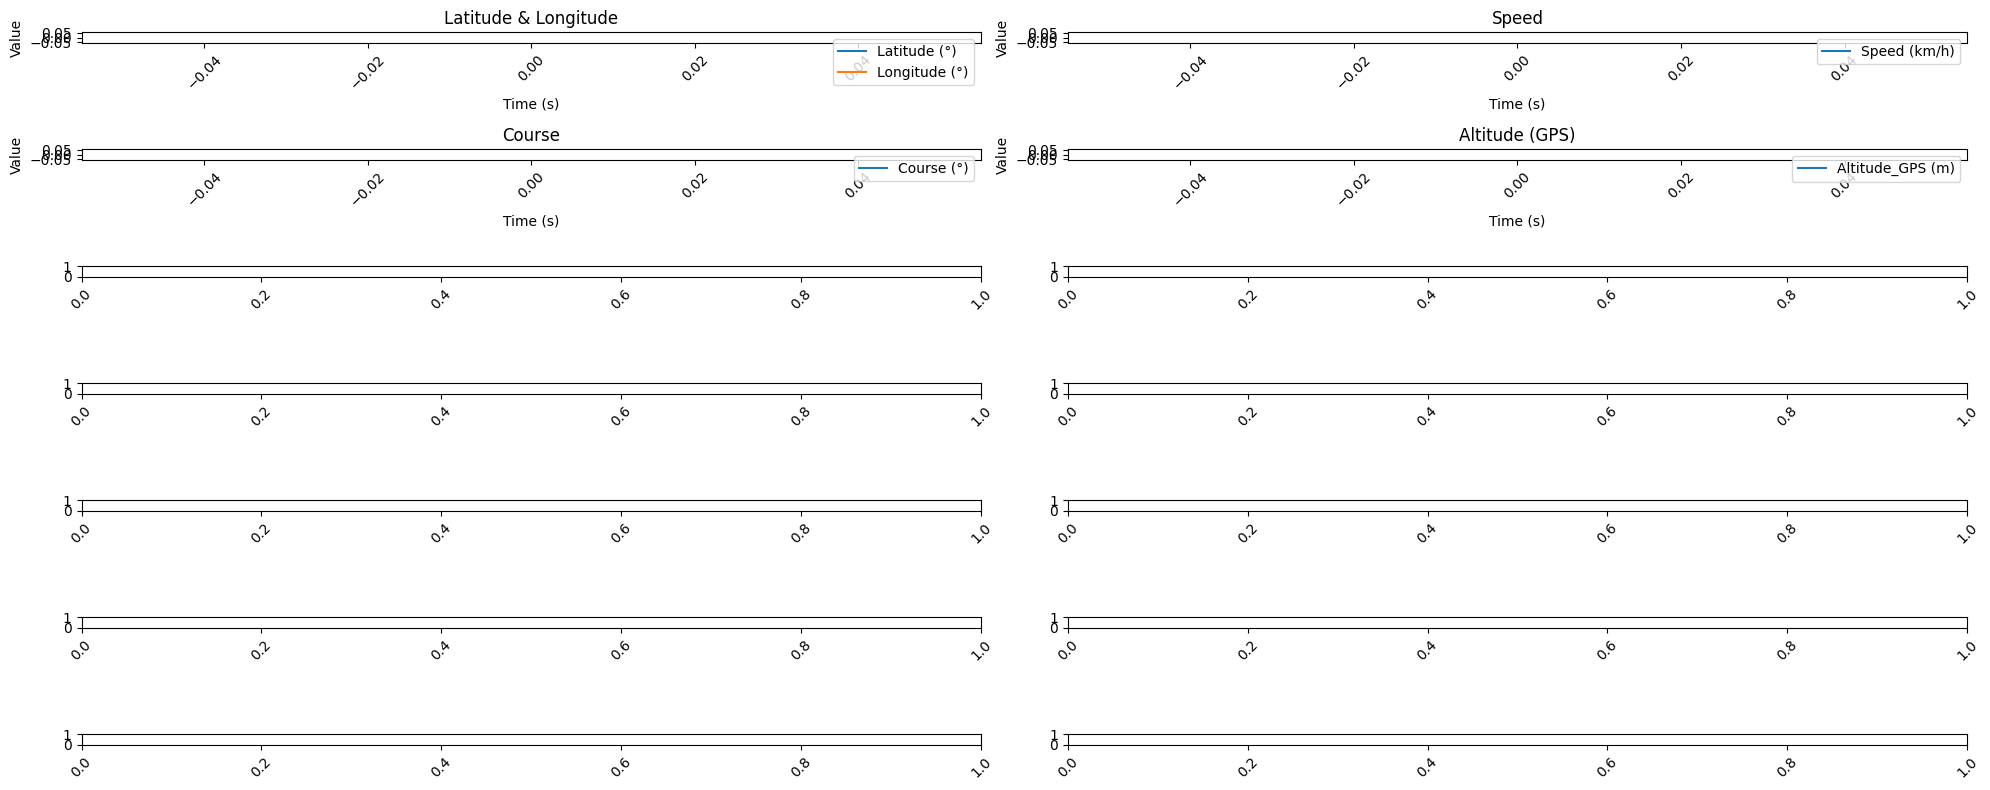

In [133]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(7, 2,figsize=(20, 8))
ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14 = axes.flatten()

# Latitude & Longitude
ax1.plot(df['second'], df['Latitude'], label='Latitude (°)')
ax1.plot(df['second'], df['Longitude'], label='Longitude (°)')
ax1.set_title('Latitude & Longitude')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Value')
ax1.legend()

# Speed
ax2.plot(df['second'], df['Speed'], label='Speed (km/h)')
ax2.set_title('Speed')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Value')
ax2.legend()

# Course
ax3.plot(df['second'], df['Course'], label='Course (°)')
ax3.set_title('Course')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Value')
ax3.legend()

# Altitude_GPS
ax4.plot(df['second'], df['Altitude_GPS'], label='Altitude_GPS (m)')
ax4.set_title('Altitude (GPS)')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Value')
ax4.legend()

# หมุน tick labels ทุกกราฟ
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)

fig.tight_layout()
plt.show()


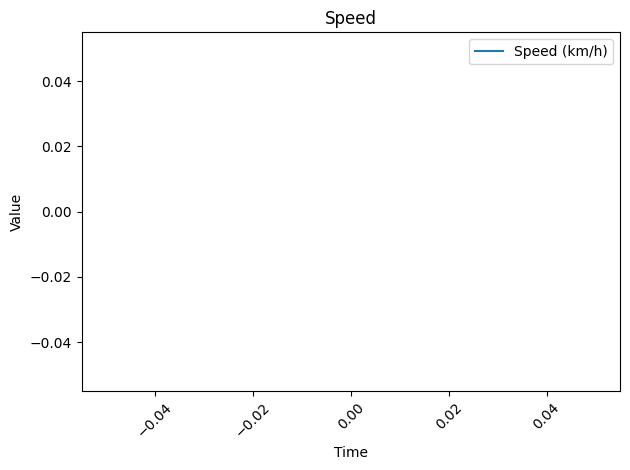

In [93]:
# speed
plt.figure()
plt.plot(df['second'], df['Speed'], label='Speed (km/h)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Speed')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

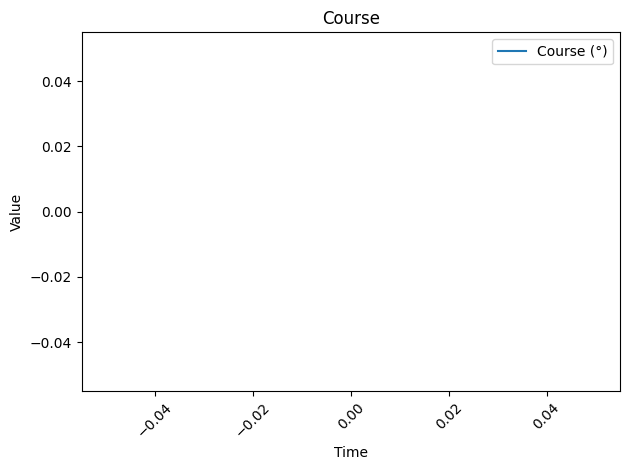

In [ ]:
# course
plt.figure()
plt.plot(df['second'], df['Course'], label='Course (°)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Course')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

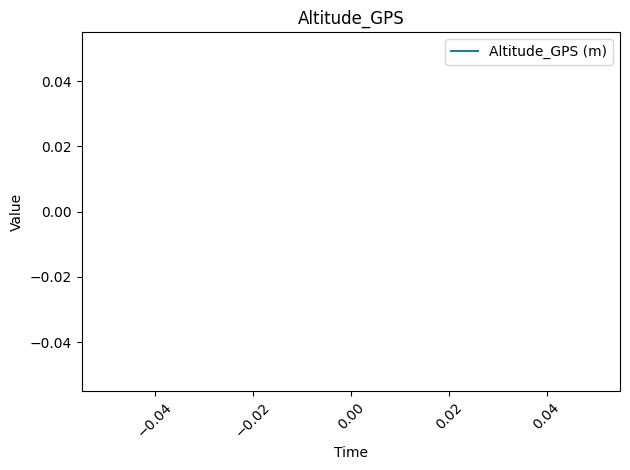

In [128]:
# Altitude_GPS
plt.figure()
plt.plot(df['second'], df['Altitude_GPS'], label='Altitude_GPS (m)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Altitude_GPS')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

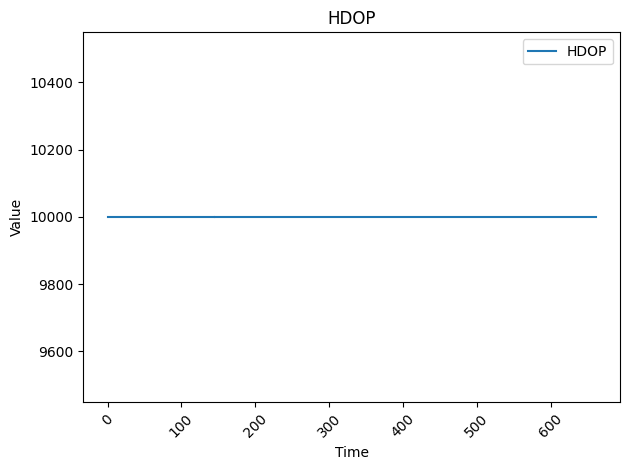

In [129]:
# HDOP
plt.figure()
plt.plot(df['second'], df['HDOP'], label='HDOP')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('HDOP')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()